In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/train.csv")
df.head()


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


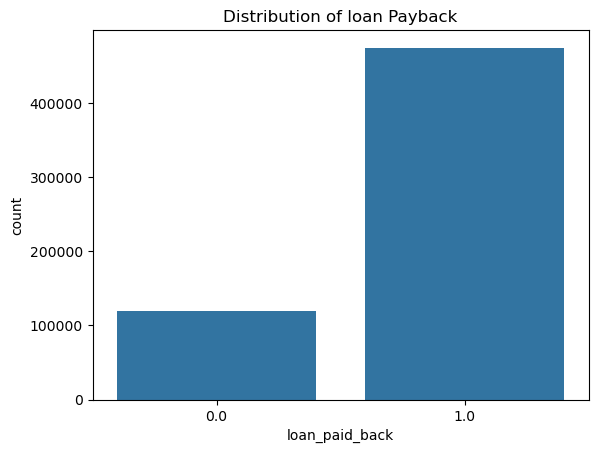

loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64

Percentage:
loan_paid_back
1.0    79.881952
0.0    20.118048
Name: proportion, dtype: float64


In [4]:
sns.countplot(x='loan_paid_back', data=df)
plt.title('Distribution of loan Payback')
plt.show()

print(df['loan_paid_back'].value_counts())
print("\nPercentage:")
print(df['loan_paid_back'].value_counts(normalize=True) * 100)


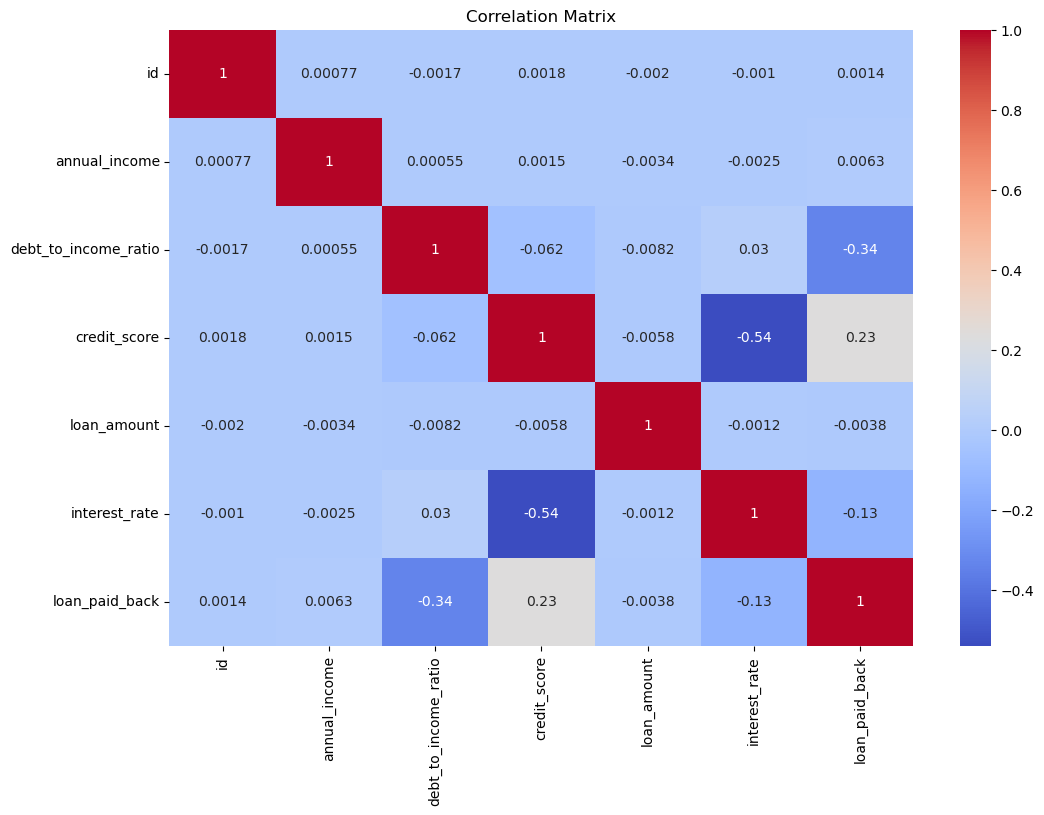

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Categorical columns: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']


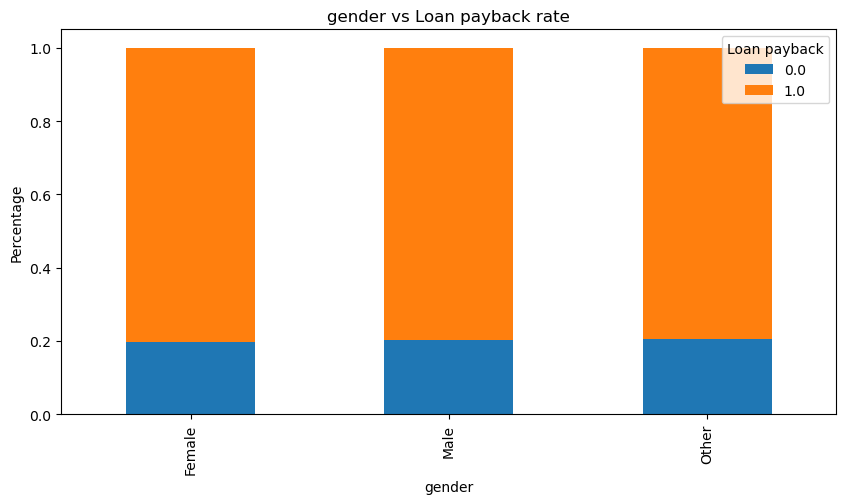

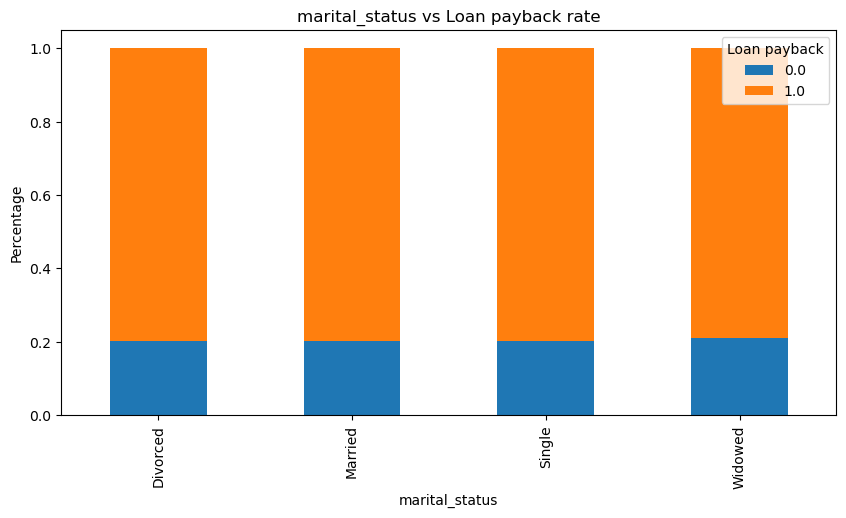

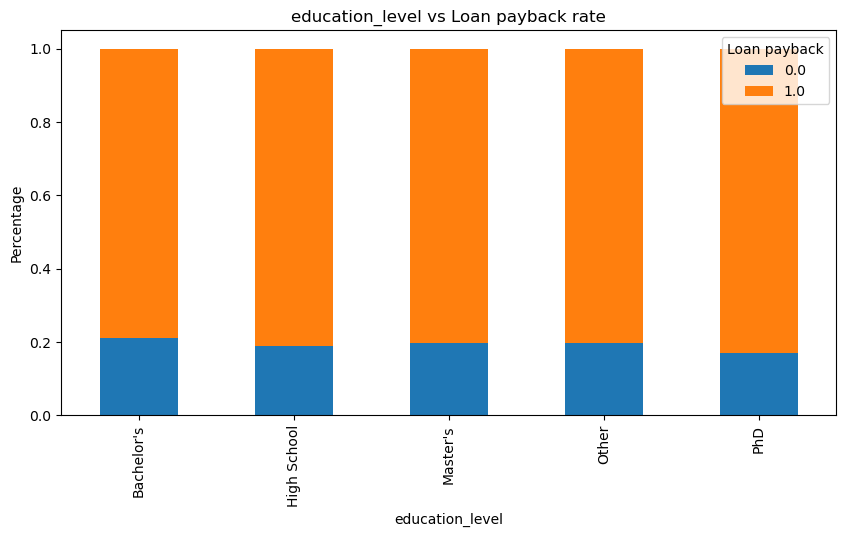

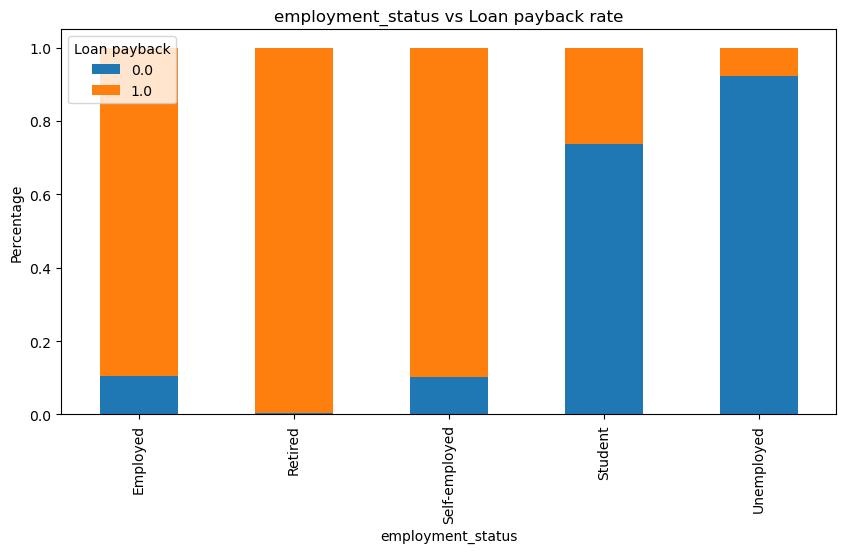

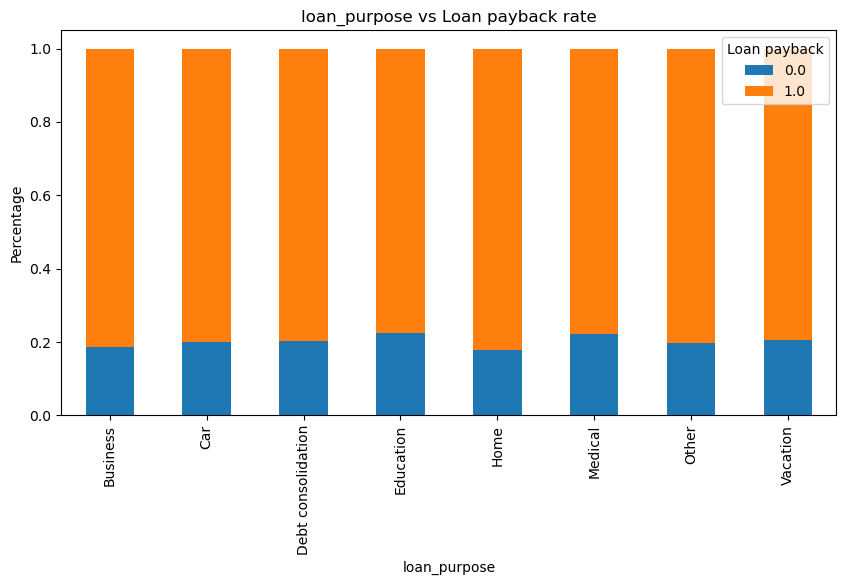

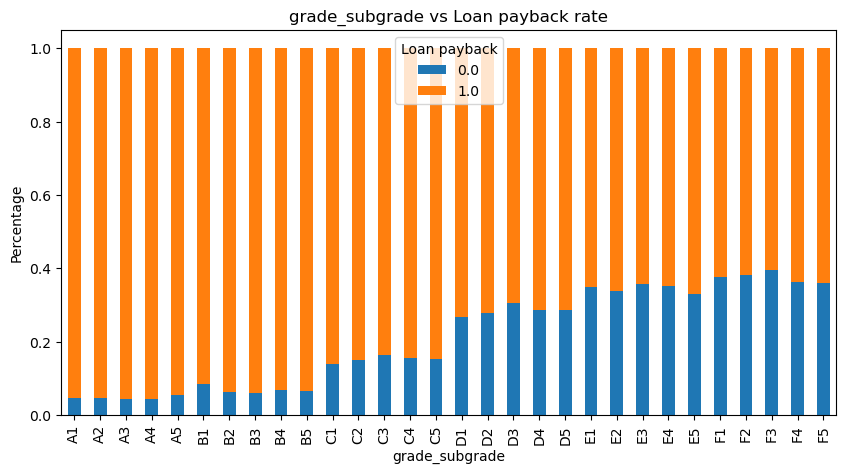

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    ct = pd.crosstab(df[col], df['loan_paid_back'])

    ct_normalized = ct.div(ct.sum(axis=1), axis=0)
    
    ct_normalized.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'{col} vs Loan payback rate')
    plt.ylabel('Percentage')
    plt.legend(title='Loan payback')
    plt.show()

In [16]:
df['grade_group'] = df['grade_subgrade'].astype(str).str[0]
df = df.drop('grade_subgrade', axis=1)

In [21]:
cols_to_drop = ['id', 'annual_income', 'loan_amount',
                 'gender', 'marital_status', 'education_level']

df_clean = df.drop(cols_to_drop, axis=1)

df_clean.head()

,debt_to_income_ratio,credit_score,interest_rate,employment_status,loan_purpose,loan_paid_back,grade_group
0,0.084,736,13.67,Self-employed,Other,1.0,C
1,0.166,636,12.92,Employed,Debt consolidation,0.0,D
2,0.097,694,9.76,Employed,Debt consolidation,1.0,C
3,0.065,533,16.10,Employed,Debt consolidation,1.0,F
4,0.053,665,10.21,Employed,Other,1.0,D


In [22]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)
df_encoded.head()

,debt_to_income_ratio,credit_score,interest_rate,loan_paid_back,employment_status_Retired,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,grade_group_B,grade_group_C,grade_group_D,grade_group_E,grade_group_F
0,0.084,736,13.67,1.0,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,0.166,636,12.92,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0.097,694,9.76,1.0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,0.065,533,16.10,1.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,0.053,665,10.21,1.0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
